In order to see the interactive plots please use Python 3.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
%load_ext autoreload
%autoreload 2
import plots

np.random.seed(2)

Let us consider the following two-dimensional, differentiable, convex (why ?) function: 
$$f(x,y) = x^2 + 6 \cdot y^2$$

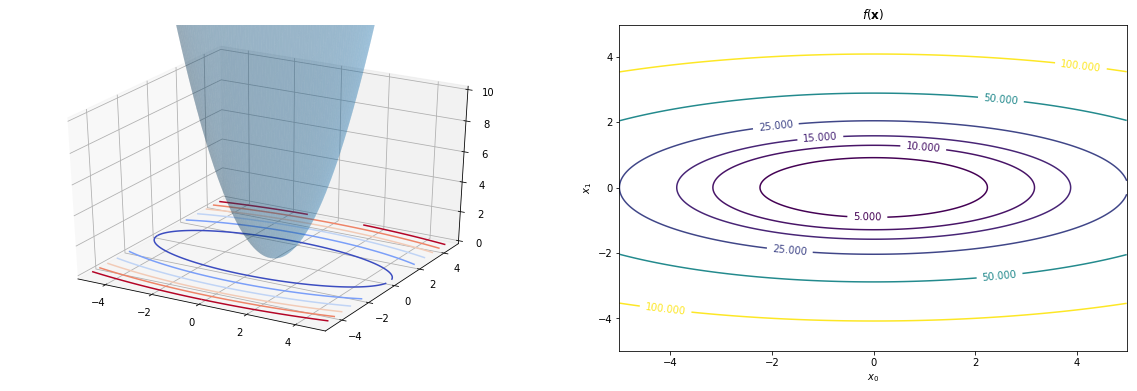

In [7]:
def f(x):
    return x[0] ** 2 + 6 * x[1] ** 2

def f_grad(x):
    return np.array([2 * x[0], 12 * x[1]])

plots.initial_plot(f)

Suppose we want to minimize $f$ with gradient descent procedures. For this, we must be able to determine the gradients or at least be able to get a noisy, unbiased estimate of them. In technical jargon: we must have access to the "gradient oracle". Let us inspect several methods.

In [12]:
def gradient_descent(grad, init, step_size, nr_iter):
    trajectory = [init]
    w = init
    for it in range(nr_iter):
        w = w - step_size * grad(w)
        trajectory.append(w)
    return np.array(trajectory)

def gradient_descent_with_decreasing_steps(grad, init, step_size, nr_iter):
    trajectory = [init]
    w = init
    for it in range(nr_iter):
        w = w - step_size / np.power(it + 1, 0.6) * grad(w)
        trajectory.append(w)
    return np.array(trajectory)

def adagrad(grad, init, step_size, nr_iter):
    trajectory = [init]
    grad_accum = np.zeros(2)
    w = init
    for it in range(nr_iter):
        grad_accum += grad(w) ** 2
        w = w - step_size / np.sqrt(grad_accum) * grad(w)
        trajectory.append(w)
    return np.array(trajectory)

def sgd(grad, init, step_size, nr_iter):
    trajectory = [init]
    w = init
    for it in range(nr_iter):
        w = w - step_size / np.power(it + 1, 0.6) * (grad(w) + np.random.normal(0, 20, 2))
        trajectory.append(w)
    return np.array(trajectory)

** Remarks ** 
* the step_size is a crucial parameter in all methods that should be tuned for each specific problem.
* SGD proves the concept of stochastic approximation by perturbing the gradients with $\mathcal{N}(0, 20)$. As long as:
 * the estimate of the gradient is unbiased, that is $\mathbb{E} [\nabla \tilde f] = \nabla f$, (exercise: prove this for our case) 
 * the step sizes obey the Robbins-Monro conditions: $\sum_{t=1}^\infty \eta_t = \infty$, $\sum_{t=1}^\infty \eta_t^2 < \infty$ (exercise: prove this for our case, where $\eta_t = 1 / t^{0.6}$)
 
 then for our convex function almost sure convergence (in $L^2$) to the global minimum is guranteed.
* in practice, the noisy gradient estimation results from the intractability of calculating the true gradient. 

In [13]:
w_init = np.array([-4.5, 5])
max_iter = 100

step_size = {
            "GD": 0.15,
            "GD decr. steps": 0.15,
            "SGD": 0.1,
            "AdaGrad": 1.5
}

trajectory = {
    "GD": gradient_descent(f_grad, w_init, step_size["GD"], max_iter),
    "GD decr. steps": gradient_descent_with_decreasing_steps(f_grad, w_init, step_size["GD decr. steps"], max_iter),
    "SGD": sgd(f_grad, w_init, step_size["SGD"], max_iter),
    "AdaGrad": adagrad(f_grad, w_init, step_size["AdaGrad"], max_iter)
}

def plot_figure(method, n_iter):
    fig = plots.trajectory_visualization(f, n_iter, trajectory[method])

interact(plot_figure, method={"GD", "GD decr. steps", "SGD", "AdaGrad"}, step_size=FloatSlider(min=0.01, max=2), n_iter=IntSlider(min=1, max=max_iter))

A Jupyter Widget

<function __main__.plot_figure>